In [9]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Zadanie

Dysponujesz danymi z portalu Our World in Data dotyczącymi:
- Pierwotnej konsumpcji energii
- Emisji CO2 z poszczególnych lat dla różnych krajów

## Część 1: Plik CSV
Utwórz plik CSV zawierający połączone dane dla Polski:
- konsumpcja energii pierwotnej
- emisja CO2
- dane z poszczególnych lat

## Część 2: Plik Excel
Stwórz plik Excel z osobnymi zakładkami dla każdego kraju:
- UE
- USA
- Chiny
- Indie

Każda zakładka powinna zawierać dane o konsumpcji energii i emisji CO2.

## Część 3: Baza danych SQLite
Utwórz bazę danych SQLite z tabelą zawierającą:
- kraj
- rok
- emisja CO2
- konsumpcja energii

Dane powinny obejmować: Polskę, Niemcy i Hiszpanię.

## Część 4: Analiza i wizualizacja
Na podstawie danych z pliku Excel i bazy SQLite utwórz wykresy:
- emisja CO2 w zależności od roku (dla wybranego kraju)
- konsumpcja energii pierwotnej w zależności od roku (dla wybranego kraju)
- **dla chęnych szukanie koreacji**

In [2]:
df_co2 = pd.read_csv("co2-emissions-per-capita.csv")
df_co2.head()

,Entity,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,1949,0.001992
1,Afghanistan,1950,0.010837
2,Afghanistan,1951,0.011625
3,Afghanistan,1952,0.011468
4,Afghanistan,1953,0.013123


In [3]:
df_primary_energy = pd.read_csv("primary-energy-cons.csv")
df_primary_energy.head()

,Entity,Code,Year,Primary energy consumption (TWh)
0,Afghanistan,AFG,1980,6.337187
1,Afghanistan,AFG,1981,7.289555
2,Afghanistan,AFG,1982,7.889244
3,Afghanistan,AFG,1983,9.882159
4,Afghanistan,AFG,1984,9.929878


Zadanie 1

In [4]:
lacz = pd.merge(df_co2, df_primary_energy, on=["Entity", "Year"])
#print(lacz[lacz['Entity'] == 'Poland'])

lacz[lacz['Entity'] == 'Poland'].to_csv("Polska.csv")

Zadanie 2

In [5]:
import openpyxl

wb = openpyxl.Workbook()

arkusz1 = wb.active

arkusz1.title = "UE"
ue = lacz[lacz['Entity'].str.contains('European Union')]
for row in ue.itertuples(index=False):
  arkusz1.append(row)

arkusz2 = wb.create_sheet("USA")
usa = lacz[lacz['Entity'] == 'United States']
for row in usa.itertuples(index=False):
  arkusz2.append(row)

arkusz3 = wb.create_sheet("Chiny")
chn = lacz[lacz['Entity'] == 'China']
for row in chn.itertuples(index=False):
  arkusz3.append(row)

arkusz4 = wb.create_sheet("Indie")
ind = lacz[lacz['Entity'] == 'India']
for row in ind.itertuples(index=False):
  arkusz4.append(row)

wb.save("dane.xlsx")

Zadanie 3

In [6]:
query = """
CREATE TABLE dane
(kraj VARCHAR(20), rok varchar(4), emisja REAL, konsumpcja REAL);
"""
conn = sqlite3.connect("baza.sqlite")
conn.execute(query)

conn.commit()

daneDoBazy = lacz[lacz['Entity'].isin(['Poland', 'Germany', 'Spain'])].drop('Code', axis = 1)

conn.executemany("INSERT INTO dane (kraj, rok, emisja, konsumpcja) VALUES (?,?,?,?)", daneDoBazy.itertuples(index=False))
conn.commit()


Zadanie 4

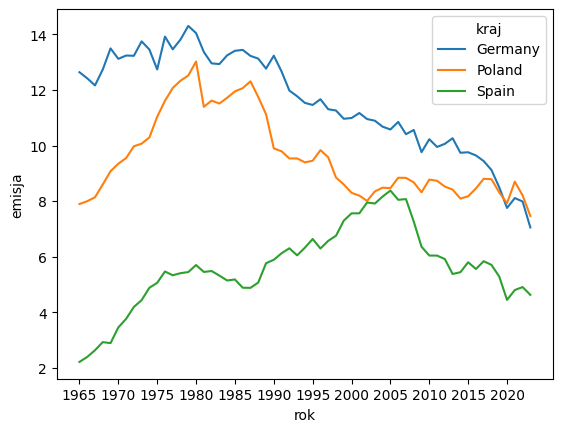

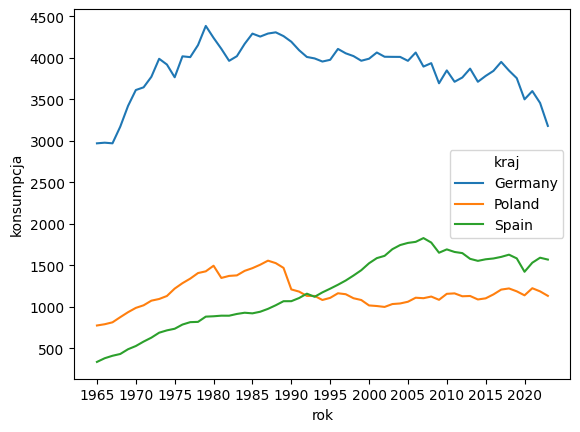

In [20]:
daneDoWykresu = pd.read_sql_query("SELECT * FROM dane", conn)

lataNaX = sorted(daneDoWykresu['rok'].unique())

sns.lineplot(data = daneDoWykresu, x = "rok", y = "emisja", hue = "kraj")
plt.xticks(lataNaX[::5])
plt.show()

sns.lineplot(data = daneDoWykresu, x="rok", y="konsumpcja", hue="kraj")
plt.xticks(lataNaX[::5])
plt.show()